# Group Project 3 - MSDS 7331
## Southern Methodist University 
# Glenn, Tweardy, Severance

## Business Understanding

The dataset for analysis originates from the UCI Machine Learning Repository. It contains data from the 1994 Census database and was originally extracted by Barry Becker. These data contain 48,842 observations and 14 attributes seperated in two distinct datsets, training and testing. Becker extracted the census data based on meeting all of the following four conditions:
        
        1. AAGE > 16
        2. AGI > 100
        3. AFNLWGT > 1
        4. HRSWK > 0

As noted, these data are split by Becker into train-test datasets using MLC++ GenCVFiles (2/3, 1/3 random).

48,842 instances, mix of continuous and discrete    (train=32,561, test=16,281)

45,222 of instances with unknown values are removed (train=30,162, test=15,060)

train = adult.data AND test = adult.test

Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

The original task for gathering this dataset and what will be analyzed throughout this semester's project is to predict whether an individual earns more than $50,000 per year in annual salary.  The attribte salary_range designates the annual salary via a binary classification of: >50K or <=50K.

We aim to use cluster analysis method of taking the collection of records (adult.data) as the training set, whereas salary_range is the class.  We will develop a model which aims to predict the class, salary_range, as a function of the other attributes.  Ultimately, our goal is take the test data, adult.test, and predict the class, salary_range, as accurately as possible.  Therefore, below we are preprocessing the training dataset, adult.data, containing the 32,561 instances.

In conducting an analysis on this data, there are many reasons why an organization would benefit from it. One in particular could be from a marketing standpoint. Businesses invest a large portion of there expenditures toward their marketing department to make sure that they market their products toward the correct demographics. For example, marketing the latest and greatest BMW to a demographic of individuals that make less than $50k annually is probably not a smart business decision and would undoubtedly fail. The financial cost of this mistake could potentially cost a company millions of dollars. The benefit a company has to understanding their customer base can truly be a profitable advantage. The factors in this model could be used by an organization to manage their marketing activity by developing and advertising products to meet the needs of their specific customer base.

If you were to market a BMW to a certain demographic by email, you do not mind if you have false positives. We want to email all people that our data say is a positive even if it may be wrong. We are ok sending it out to a false positive in order to get the email out to the correct demographic since this is a cheap way of advertising. This is considered high recall. 

Conversely, if you were to hold a car show and put people up in a hotel and wine and dine the customers, you would not want to miss your demographics and invite the wrong demographics. It is much more expensive to advertise to the wrong group. Therefore, we are okay with not sending the invite to people because we have them classified wrong. This would be considered high precision because everyone that is invited will have been classified correctly even if we miss some.

We know this example might be considered an extreme, but we are focusing this project on the scenario of sending out an email advertising campaign.  

## Project Data Import

We first load our Project dataset and prepare it for analysis. 

<b>The below describes the meaning and type of data for each attribute in the data file per UCI Machine Learning Repository:</b><br>
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names<br>

<b>age:</b> <u>Ordinal.</u><br>
<b>workclass:</b> <u>Categorical.</u> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
<b>fnlwgt:</b> <u>Continuous.</u><br>
<b>education:</b> <u>Categorical.</u> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
<b>education-num:</b> <u>Ordinal.</u><br>
<b>marital-status:</b> <u>Categorical.</u> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
<b>occupation:</b> <u>Categorical.</u> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
<b>relationship:</b> <u>Categorical.</u> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
<b>race:</b> <u>Categorical.</u> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
<b>sex:</b> <u>Categorical.</u> Female, Male.<br>
<b>capital-gain:</b> <u>Continuous.</u><br>
<b>capital-loss:</b> <u>Continuous.</u><br>
<b>hours-per-week:</b> <u>Ordinal.</u><br>
<b>native-country:</b> <u>Categorical.</u> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
<b>salary_category:</b> <u>Categorical.</u> >50K, <=50K.<br>

The attribute fnlwgt needs definition, therefore, per the UCI Machine Learning Repository, the following is the description of fnlwgt (final weight).

<i>"The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state."</i><br>

In [43]:
import pandas as pd
import numpy as np

# reference: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# load data and assign attribute field names

df = pd.read_csv('data/adult.data', 
names = ["age", "workclass", "fnlwgt", "education", "education_num","marital_status","occupation",
         "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country",
         "salary_category"])

## Verifying data

In [44]:
# View the top 5 records
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The above command, df.head(), prints the top 5 records; this in conjunction with the below code verifies adult.data successfully loaded in the Pandas dataframe.

In [3]:
# Produce a summary of the variables
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
education_num      32561 non-null int64
marital_status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
hours_per_week     32561 non-null int64
native_country     32561 non-null object
salary_category    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


The above command, print df.info(), prints out a summary of the variables, confirming all data is read into the dataframe.  We note Pandas interpretted the continous varibles as objects, we will recast as continous floating point variables below.

## Transforming Data & Evaluating Missing Data
<b>The below block code is our transformation and removal of missing data.</b>

In [4]:
# reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb
# Changing the numeric values to be floats

continuous_features = ['fnlwgt', 'capital_gain', 'capital_loss']

# Changing oridnal values to be integers
ordinal_features = ['age','education_num','hours_per_week']

# We keep these variables as categorical. but perfom One-Hot encoding to make them more intuitive
categ_features = ['workclass','education','marital_status','occupation',
                  'relationship','race','sex','native_country','salary_category'];

# Using the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

# View the summary and top 5 records
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null float64
education          32561 non-null object
education_num      32561 non-null int64
marital_status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital_gain       32561 non-null float64
capital_loss       32561 non-null float64
hours_per_week     32561 non-null int64
native_country     32561 non-null object
salary_category    32561 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_category
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K


Checking the above summary of the variables and top 5 records verifies the data has been recast successfully.<br>

As noted in the business understanding section, the UCI Machine Learning Repository notes missing data exists with the training dataset containing 30,162 records once missing values are removed. The below code will enable us to determine which attributes contain missing data. 

In [5]:
# Replacing missing values which are represented as question marks in data with NaN 
df = df.replace(to_replace=' ?', value=np.nan)

# View the summary of the variables to quantify missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          30725 non-null object
fnlwgt             32561 non-null float64
education          32561 non-null object
education_num      32561 non-null int64
marital_status     32561 non-null object
occupation         30718 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital_gain       32561 non-null float64
capital_loss       32561 non-null float64
hours_per_week     32561 non-null int64
native_country     31978 non-null object
salary_category    32561 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


From the above, three categorical attributes contain missing data: <br>
workclass       30,725 (1,836 missing values) <br>
occupation      30,718 (1,843 missing values) <br>
native_country  31,978 (  583 missing values) <br>

At this point in the analysis, we have two options; remove the missing values or impute them. At this stage in the analysis we will remove all records containing a missing value, which should leave 30,162 records.<br>

Our justification for removing the missing values is:<br>
   1. The missing data is located in categorical attributes which does not lend toward arithmetically imputing.
   2. Any attempt to impute an occupation at this point would be a pure guess, which may cause more harm in our predication modeling attempt.
   3. Additionally, without knowing occupation we cannot determine workclass.
   4. The missing data is not a significant volume of data, only 7.4%, or 2,399 records (32,561 minus 30,162).

In [6]:
# http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan
# Drop all records with any values of NaN (missing values)

df.dropna(inplace=True)

# View the summary of the variables to verify records with missing values were removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age                30162 non-null int64
workclass          30162 non-null object
fnlwgt             30162 non-null float64
education          30162 non-null object
education_num      30162 non-null int64
marital_status     30162 non-null object
occupation         30162 non-null object
relationship       30162 non-null object
race               30162 non-null object
sex                30162 non-null object
capital_gain       30162 non-null float64
capital_loss       30162 non-null float64
hours_per_week     30162 non-null int64
native_country     30162 non-null object
salary_category    30162 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


The above confirms we now have a dataset with no missing values; 30,162 records matches UCI count.<br>

Below we look further at each of the categorical objects.

In [7]:
# reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb

# View categorical variables which need to be One-Hot encoded.

df[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary_category']].describe().transpose()

,count,unique,top,freq
workclass,30162,7,Private,22286
education,30162,16,HS-grad,9840
marital_status,30162,7,Married-civ-spouse,14065
occupation,30162,14,Prof-specialty,4038
relationship,30162,6,Husband,12463
race,30162,5,White,25933
sex,30162,2,Male,20380
native_country,30162,41,United-States,27504
salary_category,30162,2,<=50K,22654


A look at our 9 categorical variables reveals:
* Workclass has 7 unique values, the most frequently occurring value is 'Private' - 74% of all occurances (22,286/30,162)
* Education has 16 unique values, the most frequently occurring value is 'HS-Grad' - 33% of all occurances (9,840/30,162)
* Marrital Status has 7 unique values, the most frequently occurring value is 'Married-Civ-Spouse' - 47% of all occurances (14,065/30,162) 
* Occupation has 14 unique values, the most frequently occurring value is 'Prof-speciality' - 13% of all occurances (4,038/30,162)
* Relationship has 6 unique values, the most frequently occurring value is 'Husband' - 41% of all occurances (12,463/30,162)
* Race has 5 unique values, the most frequently occurring value is 'White' - 86% of all occurances (25,933/30,162)
* Sex has 2 unique values, the most frequently occurring value is 'Male' - 68% of all occurances (20,380/30,162)
* Native Country has 41 unique values, the most frequently occurring value is 'United States' - 91% of all occurances (27,504/30,162)
* Salary Category has 2 unique values, the most frequently occurring value is '<=50K' - 75% of all occurances (22,654/30,162)

## Attribute Evaluation

In [8]:
#http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once

df_grouped = df.groupby(by=['salary_category'])
df_grouped.describe()

age  capital_gain  capital_loss  \
salary_category                                                   
 <=50K          count  22654.000000  22654.000000  22654.000000   
                mean      36.608060    148.893838     53.448000   
                std       13.464631    936.392280    310.270263   
                min       17.000000      0.000000      0.000000   
                25%       26.000000      0.000000      0.000000   
                50%       34.000000      0.000000      0.000000   
                75%       45.000000      0.000000      0.000000   
                max       90.000000  41310.000000   4356.000000   
 >50K           count   7508.000000   7508.000000   7508.000000   
                mean      43.959110   3937.679808    193.750666   
                std       10.269633  14386.060019    592.825590   
                min       19.000000      0.000000      0.000000   
                25%       36.000000      0.000000      0.000000   
                50%       43.000000      0.000000      0.000000   
                75%       51.000000      0.000000      0.000000   
                max       90.000000  99999.000000   3683.000000   

                       education_num        fnlwgt  hours_per_week  
salary_category                                                     
 <=50K          count   22654.000000  2.265400e+04    22654.000000  
                mean        9.629116  1.903386e+05       39.348592  
                std         2.413596  1.065713e+05       11.950774  
                min         1.000000  1.376900e+04        1.000000  
                25%         9.000000  1.173120e+05       38.000000  
                50%         9.000000  1.795085e+05       40.000000  
                75%        10.000000  2.394390e+05       40.000000  
                max        16.000000  1.484705e+06       99.000000  
 >50K           count    7508.000000  7.508000e+03     7508.000000  
                mean       11.606420  1.881500e+05       45.706580  
                std         2.368423  1.028217e+05       10.736987  
                min         2.000000  1.487800e+04        1.000000  
                25%        10.000000  1.191005e+05       40.000000  
                50%        12.000000  1.761850e+05       40.000000  
                75%        13.000000  2.310660e+05       50.000000  
                max        16.000000  1.226583e+06       99.000000

<b>Summary Statistics</b><br>

75% (22,654) are classified as making less than or equal to $50K per year<br>
   * The important descriptive statistics for this group follows:<br>
      - Mean Age:            36.6 +/- 13.4 (std)<br>
      - Mean Education:       9.6 +/-  2.4 (std)<br>
      - Mean Hours per week: 39.3 +/- 12.0 (std)<br>
      - Capital Gain:       148.9 +/- 936.4 (std) <br>
      - Capital Loss:        53.4 +/- 310.3 (std) <br>
        
25% (7,508) are classified as making more than $50K per year<br>
   * The important descriptive statistics for this group follows:<br>
      -  Mean Age:            44.0 +/- 10.3 (std)<br>
      -  Mean Education:      11.6 +/-  2.4 (std)<br>
      -  Mean Hours per week: 45.7 +/- 10.7 (std)<br>
      -  Capital Gain:       3937.7 +/- 14,387.1 (std) <br>
      -  Capital Loss:        193.8 +/- 592.8 (std) <br>        

In [9]:
# Create a binary attribute from the categorical salary_category attribute
# http://chrisalbon.com/python/pandas_create_column_with_loop.html

salary_cat_binary = []

for row in df['salary_category']:
    # if more than a value,
    if row == " >50K":
        salary_cat_binary.append(1)
    else:
        salary_cat_binary.append(0)

df['salary_cat_binary'] = salary_cat_binary

In [10]:
# View the summary of the variables to ensure salary_cat_binary type is Int64
df.info()

# View the summary summary statistics by the salary_cat_binary to ensure data aligns with salary_category
df_grouped = df.groupby(by=['salary_cat_binary'])
df_grouped.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 16 columns):
age                  30162 non-null int64
workclass            30162 non-null object
fnlwgt               30162 non-null float64
education            30162 non-null object
education_num        30162 non-null int64
marital_status       30162 non-null object
occupation           30162 non-null object
relationship         30162 non-null object
race                 30162 non-null object
sex                  30162 non-null object
capital_gain         30162 non-null float64
capital_loss         30162 non-null float64
hours_per_week       30162 non-null int64
native_country       30162 non-null object
salary_category      30162 non-null object
salary_cat_binary    30162 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 3.9+ MB


age  capital_gain  capital_loss  \
salary_cat_binary                                                   
0                 count  22654.000000  22654.000000  22654.000000   
                  mean      36.608060    148.893838     53.448000   
                  std       13.464631    936.392280    310.270263   
                  min       17.000000      0.000000      0.000000   
                  25%       26.000000      0.000000      0.000000   
                  50%       34.000000      0.000000      0.000000   
                  75%       45.000000      0.000000      0.000000   
                  max       90.000000  41310.000000   4356.000000   
1                 count   7508.000000   7508.000000   7508.000000   
                  mean      43.959110   3937.679808    193.750666   
                  std       10.269633  14386.060019    592.825590   
                  min       19.000000      0.000000      0.000000   
                  25%       36.000000      0.000000      0.000000   
                  50%       43.000000      0.000000      0.000000   
                  75%       51.000000      0.000000      0.000000   
                  max       90.000000  99999.000000   3683.000000   

                         education_num        fnlwgt  hours_per_week  
salary_cat_binary                                                     
0                 count   22654.000000  2.265400e+04    22654.000000  
                  mean        9.629116  1.903386e+05       39.348592  
                  std         2.413596  1.065713e+05       11.950774  
                  min         1.000000  1.376900e+04        1.000000  
                  25%         9.000000  1.173120e+05       38.000000  
                  50%         9.000000  1.795085e+05       40.000000  
                  75%        10.000000  2.394390e+05       40.000000  
                  max        16.000000  1.484705e+06       99.000000  
1                 count    7508.000000  7.508000e+03     7508.000000  
                  mean       11.606420  1.881500e+05       45.706580  
                  std         2.368423  1.028217e+05       10.736987  
                  min         2.000000  1.487800e+04        1.000000  
                  25%        10.000000  1.191005e+05       40.000000  
                  50%        12.000000  1.761850e+05       40.000000  
                  75%        13.000000  2.310660e+05       50.000000  
                  max        16.000000  1.226583e+06       99.000000

## Visualizing Statistics
<b>We will now describe and visualize appropriate statistics for a subset of attributes.</b>

In [11]:
# https://github.com/eclarson/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb

#https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#aesthetics-tutorial
import seaborn as sns
sns.set_style("dark")
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# This python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
from matplotlib import gridspec
import warnings
%matplotlib inline

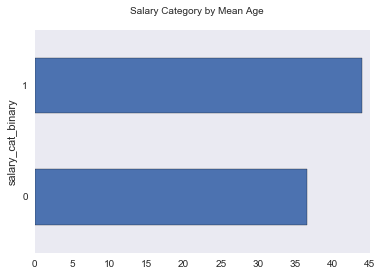

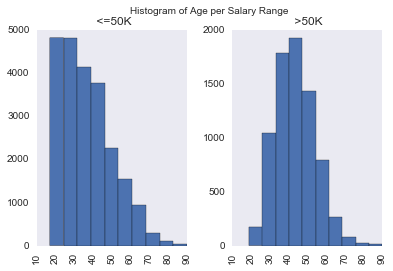

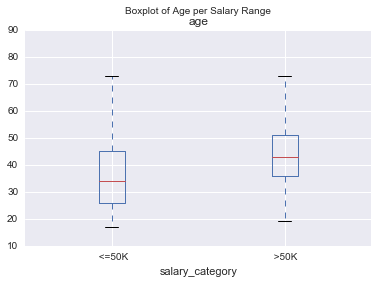

In [12]:
# Mean age of individuals in each category
plt.figure()
age_num2 = df_grouped.age.sum() / df_grouped.age.count()
age_num2.plot(kind='barh')
plt.suptitle("Salary Category by Mean Age")

# Histogram of individuals in each salary category by age
plt.figure()
df['age'].hist(by=df.salary_category) 
plt.suptitle("Histogram of Age per Salary Range")

# Boxplot of each salary category by age
df.boxplot(column='age', by = 'salary_category')
plt.suptitle("Boxplot of Age per Salary Range")

- On average, individuals that make more than 50K per year are 7.4 years older than individuals making less than or equal to 50K per year.
- As illustrated by the histograms and boxplots, individual making less than or equal to 50K per year are predominately in their 20s and 30s whereas individuals making more than 50K per year are predominately in their late 30s, 40s and early 50s.



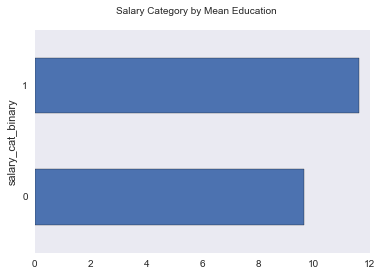

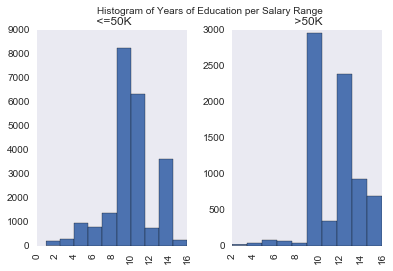

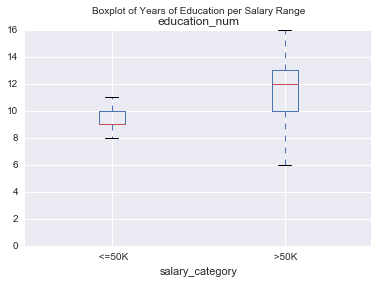

In [13]:
plt.figure()
education_num2 = df_grouped.education_num.sum() / df_grouped.education_num.count()
ax2 = education_num2.plot(kind='barh')
plt.suptitle("Salary Category by Mean Education")

plt.figure()
df['education_num'].hist(by=df.salary_category)
plt.suptitle("Histogram of Years of Education per Salary Range")

df.boxplot(column='education_num', by = 'salary_category')
plt.suptitle("Boxplot of Years of Education per Salary Range")

- On average, individuals that make more than 50K per year have 2 years additional education than individuals making less than or equal to 50K per year..
- As illustrated by the histograms and boxplots, individual making less than or equal to 50K per year predominately have less than 10 years of education whereas individuals making more than 50K per year predominately have 10 or more years of education.

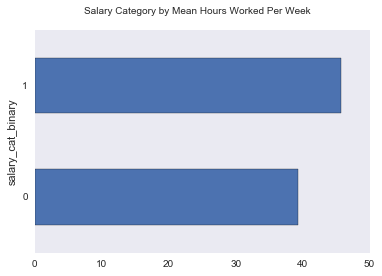

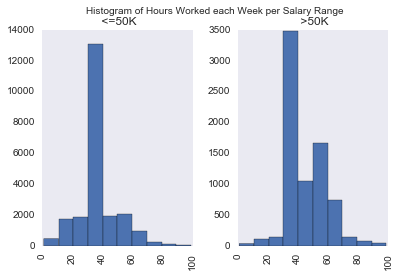

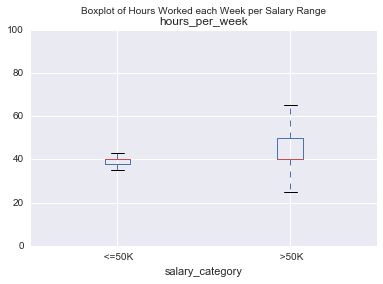

In [14]:
plt.figure()
hours_per_week2 = df_grouped.hours_per_week.sum() / df_grouped.hours_per_week.count()
ax2 = hours_per_week2.plot(kind='barh')
plt.suptitle("Salary Category by Mean Hours Worked Per Week")

plt.figure()
df['hours_per_week'].hist(by=df.salary_category)
plt.suptitle("Histogram of Hours Worked each Week per Salary Range")

df.boxplot(column='hours_per_week', by = 'salary_category')
plt.suptitle("Boxplot of Hours Worked each Week per Salary Range")

- On average, individuals that make more than 50K per year work 7 hours longer per week than individuals making less than or equal to 50K per year.
- As illustrated by the histograms and boxplots, individual making less than or equal to 50K per year predominately work less than 40 hours per week whereas individuals making more than 50K per year predominately work more than 40 hours per week.

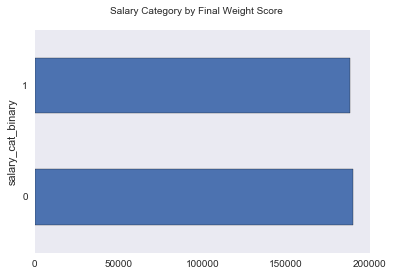

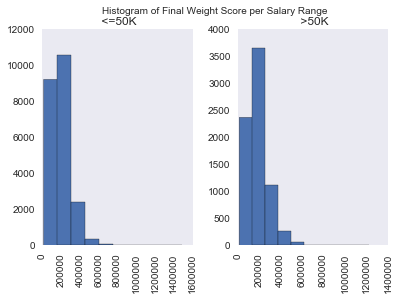

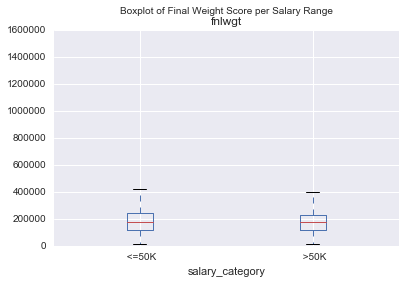

In [15]:
# plt.figure()
fnlwgt2 = df_grouped.fnlwgt.sum() / df_grouped.fnlwgt.count()
ax2 = fnlwgt2.plot(kind='barh')
plt.suptitle("Salary Category by Final Weight Score")

plt.figure()
df['fnlwgt'].hist(by=df.salary_category)
plt.suptitle("Histogram of Final Weight Score per Salary Range")

df.boxplot(column='fnlwgt', by = 'salary_category')
plt.suptitle("Boxplot of Final Weight Score per Salary Range")

- As illustrated by the histograms and boxplots there is not a noticable difference in the final weight score between salary category.

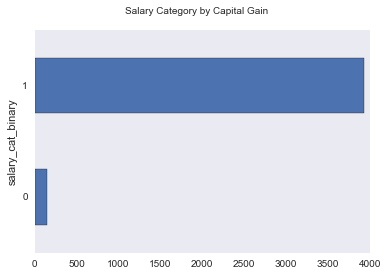

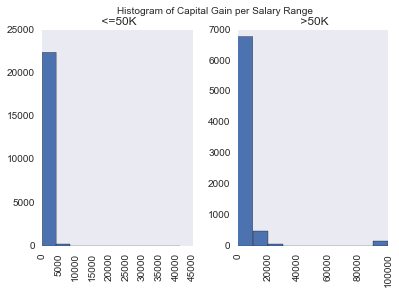

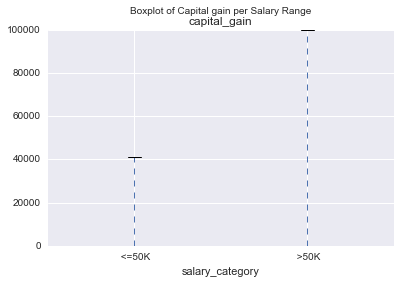

In [16]:
# plt.figure()
capgain2 = df_grouped.capital_gain.sum() / df_grouped.capital_gain.count()
ax2 = capgain2.plot(kind='barh')
plt.suptitle("Salary Category by Capital Gain")

plt.figure()
df['capital_gain'].hist(by=df.salary_category)
plt.suptitle("Histogram of Capital Gain per Salary Range")

df.boxplot(column='capital_gain', by = 'salary_category')
plt.suptitle("Boxplot of Capital gain per Salary Range")

- As illustrated by the histograms and boxplots there is a noticable difference in the capital gain between salary category. The individuals making more than 50K a year report a larger capital gain value.

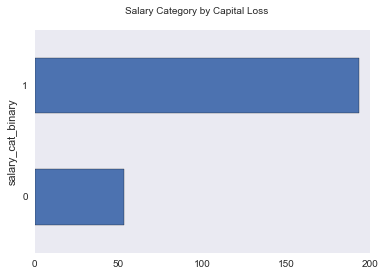

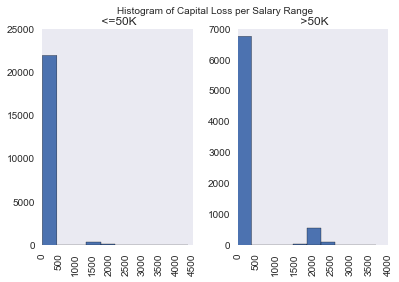

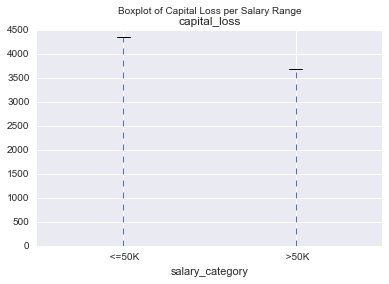

In [17]:
plt.figure()
caploss2 = df_grouped.capital_loss.sum() / df_grouped.capital_loss.count()
ax2 = caploss2.plot(kind='barh')
plt.suptitle("Salary Category by Capital Loss")

plt.figure()
df['capital_loss'].hist(by=df.salary_category)
plt.suptitle("Histogram of Capital Loss per Salary Range")

df.boxplot(column='capital_loss', by = 'salary_category')
plt.suptitle("Boxplot of Capital Loss per Salary Range")

- As illustrated by the histograms and boxplots there is a noticable difference in the capital loss between salary category. The individuals making more than 50K a year report a larger capital loss value.

salary_category  race               
 <=50K            White                 0.842853
                  Black                 0.108193
                  Asian-Pac-Islander    0.028560
                  Amer-Indian-Eskimo    0.011124
                  Other                 0.009270
 >50K             White                 0.910895
                  Black                 0.048748
                  Asian-Pac-Islander    0.033031
                  Amer-Indian-Eskimo    0.004529
                  Other                 0.002797
dtype: float64


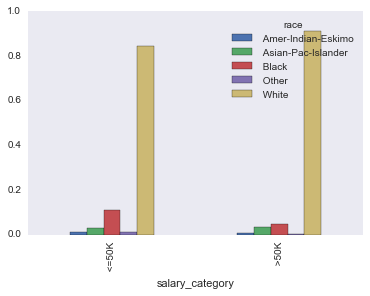

In [18]:
# http://themrmax.github.io/2015/11/13/grouped-histograms-for-categorical-data-in-pandas.htm
ag = df.groupby('salary_category').race.value_counts(normalize=True).sort_index()
ag.unstack()
ag.unstack().plot(kind='bar')

print df.groupby('salary_category').race.value_counts(normalize=True)

Above we can see the distribution of races for each salary category.<br>

* Of the individuals making less than or equal to $50K per year:
    - Whites comprise approx 84%, Blacks comprise approx. 11%, Asians comprise approx 3%<br>
    

* Of the individuals making more than $50K per year:
    - Whites comprise approx 91%, Blacks comprise approx. 5%, Asians comprise approx 3%

This suggests there is a larger percent of blacks making less than or equal to $50K per year.  While informative and helpful in guiding our exploration, the above distribution is potentially reflective of the population demographics. A better perspective is to view the normalized percentage, calculated below.  

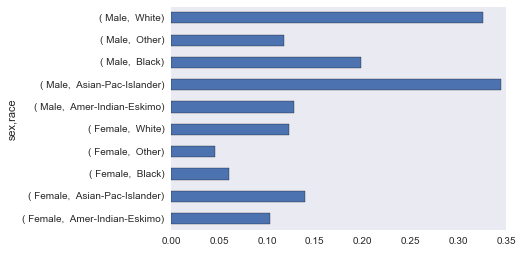

In [19]:
# Percentage of race by sex of individuals making making more than $50K!
 
df_grouped = df.groupby(by=['sex', 'race'])
race_count = df_grouped.salary_cat_binary.sum() / df_grouped.salary_cat_binary.count()
ax = race_count.plot(kind='barh')


The above normalized view reveals the group with the largest percentage making greater than 50K per year is:
- Asian males, approx. 34% of all Asian males make more than 50K per year.
- The second highest group is white males, approx. 33% of all white males make more than 50K per year.
- The third largest group is black males, approx. 20% of all black males make more than 50K per year.<br>

This data is viewable in table format and as a horizontal stacked bar graph below.

salary_cat_binary            False  True 
sex     race                             
 Female  Amer-Indian-Eskimo     96     11
         Asian-Pac-Islander    253     41
         Black                1314     85
         Other                  83      4
         White                6924    971
 Male    Amer-Indian-Eskimo    156     23
         Asian-Pac-Islander    394    207
         Black                1137    281
         Other                 127     17
         White               12170   5868


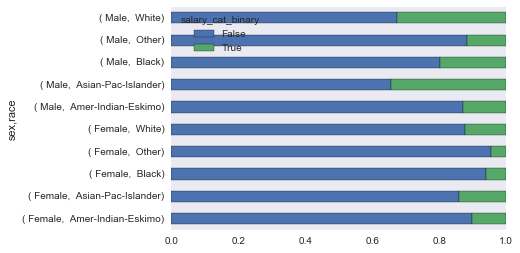

In [20]:
# the cross tab operator provides an easy way to get these numbers
salary_cat_binary = pd.crosstab([ df['sex'],df['race'] ], 
                       df.salary_cat_binary.astype(bool))
print salary_cat_binary

race_count = salary_cat_binary.div(salary_cat_binary.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
race_count.plot(kind='barh', 
                   stacked=True)

## Visualize relationship between attributes

C:\Users\Brad_2\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Brad_2\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


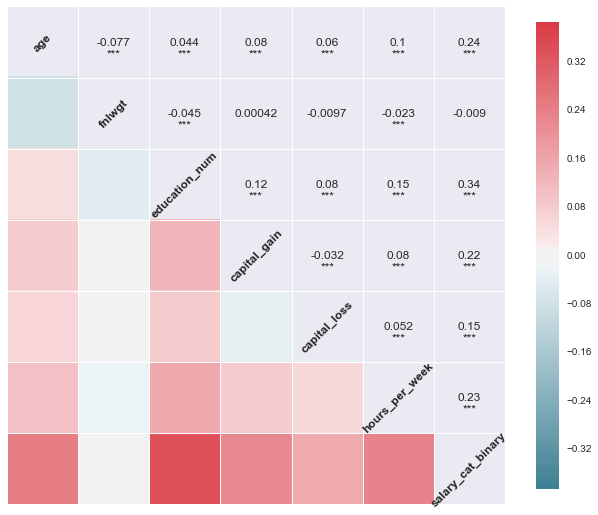

In [21]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.corrplot(df, 
             annot=True, # plot numeric annotations
             sig_stars=True, # plot significance
             diag_names=True, 
             cmap=cmap, 
             ax=ax)
f.tight_layout()

The above correlation matrix illustrates there is mild correlation with statistical significance (p-value < .05) between the following attributes:<br>
- Salary_Category is mildly positively correlated with years of education (R-Squared of 0.34)
- Salary_Category is mildly positively correlated with age (R-Squared of 0.24)
- Salary_Category is mildly positively correlated with hours worked per week (R-Squared of 0.23)
- Salary_Category is mildly positively correlated with capital gain (R-Squared of 0.22)
- Salary_Category is weakly positively correlated with capital loss (R-Squared of 0.15)
- Years of education is weakly positively correlated with hours per week (R-Squared of 0.15)
- Years of education is weakly positively correlated with capital gain (R-Squared of 0.12)
- Age is weakly positively correlated with hours worked per week (R-Squared of 0.1)
- There are other statistically significant correlations between other attributes yet all are extremely weak correlations.<br>

There are not any obvious redundant explanatory variables (note: salary category is our response variable) with Pearson Correlation Coefficients greater than .8, therefore, these data appear not to need an adjustment for multicollinearity.

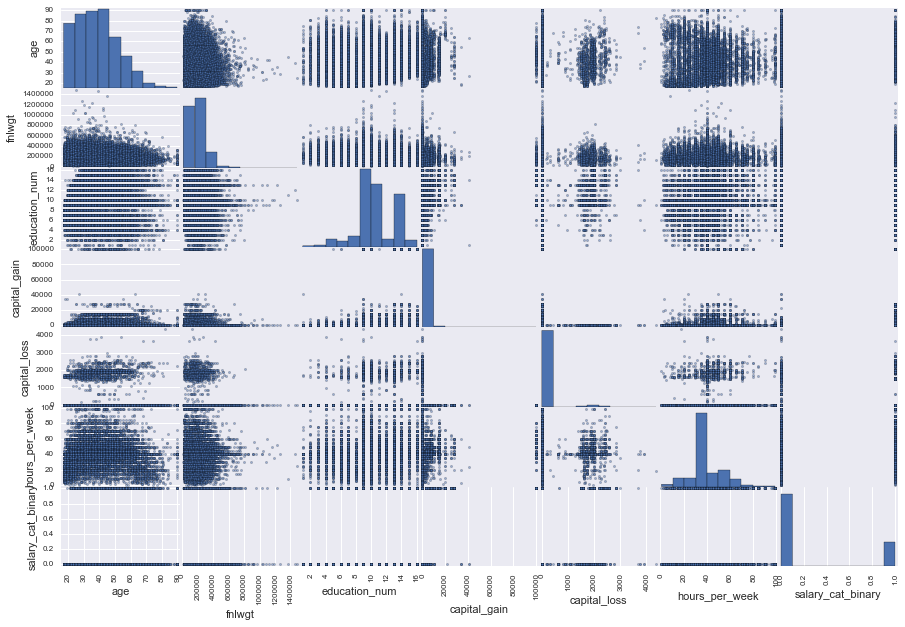

In [22]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(df,figsize=(15, 10))

<b>Begin one-hot encoding of the categorical variables</b>

In [23]:
# Perform One-Hot encoding of the categorical data 
tmp_df = pd.get_dummies(df.workclass,prefix='workclass')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['workclass']

tmp_df = pd.get_dummies(df.marital_status,prefix='marital_status')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['marital_status']

tmp_df = pd.get_dummies(df.occupation,prefix='occupation')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['occupation']

tmp_df = pd.get_dummies(df.relationship,prefix='relationship')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['relationship']

tmp_df = pd.get_dummies(df.race,prefix='race')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['race']

tmp_df = pd.get_dummies(df.native_country,prefix='native_country')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['native_country']

# Replace the current Sex atribute with something slightly more intuitive and readable
df['IsMale'] = df.sex=='Male' 
df.IsMale = df.IsMale.astype(np.int)
del df['sex']

# Replace the current Salary_Category atribute with something slightly more intuitive and readable
df['salary_cat_binary'] = df.salary_category==' >50K' 
df.salary_cat_binary = df.salary_cat_binary.astype(np.int)
del df['salary_category']

## Modeling and Evaluation
### Cluster Analysis

### Train and adjust parameters 

Based on the above analysis, we do not see possibilities for data reduction via clustering. However, to confirm our findings we explore whether clustering can be used for a combination of age, education nubmer, captial gain, capital loss, or final weight.

We start by performing 10 fold cross validation and using the raw features in a Random Forest classifer. We'll get the average accuracy of classifying whther a person makes $50K or more in annual salary. Below, we compare K-Fold cross validation to Stratrifed K-Fold cross validation.

In [24]:
# K-Fold

from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold 


if 'salary_cat_binary' in df:
    y = df['salary_cat_binary'].values # get the labels we want
    del df['salary_cat_binary']
X = df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']]

# 10 fold cross validation
cv = KFold(n=len(X), n_folds=10)
print(cv)


clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy = ", acc.mean()*100, "+-", acc.std()*100

sklearn.cross_validation.KFold(n=30162, n_folds=10, shuffle=False, random_state=None)
Average accuracy =  79.8521024539 +- 0.609805917784


In [25]:
# Stratified K-Fold

from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold 

# For this project, we are going to do a 10 fold split

if 'salary_cat_binary' in df:
    y = df['salary_cat_binary'].values # get the labels we want
    del df['salary_cat_binary']
X = df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']]

# 10 fold cross validation
cv = StratifiedKFold(y,n_folds=10)
print(cv)


clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy = ", acc.mean()*100, "+-", acc.std()*100

sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 ..., 0 0 1], n_folds=10, shuffle=False, random_state=None)
Average accuracy =  80.0610446733 +- 0.597585790076


We see a nominal increase of 0.21% in accuacy and a decrease in the standard deviation of 0.01. while the difference is not meaningful, we are going continue with stratified cross validation. Our reasoning is because the response variable, salary category, is dichotomous, it is best to divide the data into different subgroups (strata) to ensure there is proportional representation of these data in each fold.

### Evaluate and Compare

Now we can start some feature engineering. For this dataset, it makes sense to test the following combination of variables because they had some correlation as displayed in the correlation matrix above. We will test a few different parameterizations to find where we can make the classes discrete and how many levels should be made.

- Age and years of education
- Years of education and hours worked per week
- Years of education with capital gain
- Age and hours worked per week

In [26]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

X1 = df[['age', 'education_num']]

cls = KMeans(n_clusters=5, init='k-means++',random_state=1)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

y = y #df['salary_cat_binary']
X = df[['hours_per_week', 'capital_gain', 'capital_loss']]
X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy (with kmeans for Age/Years of Education)= ", acc.mean()*100, "+-", acc.std()*100

Average accuracy (with kmeans for Age/Years of Education)=  81.7784403912 +- 0.447047152039


By clustering on age and years of education level the average accuracy went up by about 1% and the standard deviation decreased by about 0.15. Now we can test a discretization of years of education and hours worked per a week.

In [27]:
from sklearn.cluster import KMeans
import numpy as np

X2 = df[['education_num', 'hours_per_week']]

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X2)
newfeature = cls.labels_ # the labels from kmeans clustering

y = y
X = df[['age', 'capital_gain', 'capital_loss']]
X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy (with kmeans for Years of Education/Hours Worked Per Week)= ", acc.mean()*100, "+-", acc.std()*100

Average accuracy (with kmeans for Years of Education/Hours Worked Per Week)=  81.6027087481 +- 0.521157473986


By clustering on age and years of education level the average accuracy went up by about 1%, but the standard deviation remained about the same still. Now we can test a discretization of years of education and capital gain.

In [28]:
from sklearn.cluster import KMeans
import numpy as np

X3 = df[['education_num', 'capital_gain']]

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X3)
newfeature = cls.labels_ # the labels from kmeans clustering

y = y
X = df[['age', 'hours_per_week', 'capital_loss']]
X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy (with kmeans for Years of Education/Capital Gain)= ", acc.mean()*100, "+-", acc.std()*100

Average accuracy (with kmeans for Years of Education/Capital Gain)=  80.1141269528 +- 0.54106112599


By clustering on age and years of education level the average accuracy and standard deviation were about the same. Now we can test a discretization of age and hours worked per a week.

In [29]:
from sklearn.cluster import KMeans
import numpy as np

X4 = df[['age', 'hours_per_week']]

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X4)
newfeature = cls.labels_ # the labels from kmeans clustering

y = y
X = df[['education_num', 'capital_gain', 'capital_loss']]
X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy (with kmeans for Age/Hours Worked Per Week)= ", acc.mean()*100, "+-", acc.std()*100

Average accuracy (with kmeans for Age/Hours Worked Per Week)=  83.0316725704 +- 0.364124451772


By clustering on age and years of education level the average accuracy went up by about 3% and the standard deviation went down by about 0.25. 

In [33]:
# get the first clustering
cls_X1 = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls_X1.fit(X1)
newfeature_X1 = cls_X1.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_X2 = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls_X2.fit(X2)
newfeature_X2 = cls_X2.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_X3 = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls_X3.fit(X3)
newfeature_X3 = cls_X3.labels_ # the labels from kmeans clustering
# append on the second clustering

cls_X4 = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls_X4.fit(X4)
newfeature_X4 = cls_X4.labels_ # the labels from kmeans clustering

y = y
X = np.column_stack((pd.get_dummies(newfeature_X1),pd.get_dummies(newfeature_X2), 
                     pd.get_dummies(newfeature_X3), pd.get_dummies(newfeature_X4)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print "Average accuracy = ", acc.mean()*100, "+-", acc.std()*100

Average accuracy =  79.706269021 +- 0.427787378417


By using only the combined cluster results, we achieved a lower accuracy, but we saw a significant decrease in the standard deviation of about 0.5. 

In [45]:
for a in range(5,8):
    for b in range(5,8):
        for c in range(5,8):
            for d in range(5,8):
                # get the first clustering
                cls_X1 = KMeans(n_clusters=a, init='k-means++',random_state=1)
                cls_X1.fit(X1)
                newfeature_X1 = cls_X1.labels_ # the labels from kmeans clustering

                # append on the second clustering
                cls_X2 = KMeans(n_clusters=b, init='k-means++',random_state=1)
                cls_X2.fit(X2)
                newfeature_X2 = cls_X2.labels_ # the labels from kmeans clustering

                # append on the second clustering
                cls_X3 = KMeans(n_clusters=c, init='k-means++',random_state=1)
                cls_X3.fit(X3)
                newfeature_X3 = cls_X3.labels_ # the labels from kmeans clustering
                # append on the second clustering

                cls_X4 = KMeans(n_clusters=d, init='k-means++',random_state=1)
                cls_X4.fit(X4)
                newfeature_X4 = cls_X4.labels_ # the labels from kmeans clustering

                y = y
                X = np.column_stack((pd.get_dummies(newfeature_X1),pd.get_dummies(newfeature_X2), 
                                     pd.get_dummies(newfeature_X3), pd.get_dummies(newfeature_X4)))

                acc = cross_val_score(clf,X,y=y,cv=cv)
                print "Clusters ", a, b, c, d,
                print "Average accuracy = ", acc.mean()*100, "+-", acc.std()*100

Clusters  5 5 5 5 Average accuracy =  78.3635681487 +- 0.486380129643
Clusters  5 5 5 6 Average accuracy =  78.6453544308 +- 0.351684213446
Clusters  5 5 5 7 Average accuracy =  78.4862450002 +- 0.417658479737
Clusters  5 5 6 5 Average accuracy =  79.1227827692 +- 0.474059085516
Clusters  5 5 6 6 Average accuracy =  79.2520623395 +- 0.310068919882
Clusters  5 5 6 7 Average accuracy =  79.1625727649 +- 0.336364780644
Clusters  5 5 7 5 Average accuracy =  79.1260973201 +- 0.468303584897
Clusters  5 5 7 6 Average accuracy =  79.2520623395 +- 0.310068919882
Clusters  5 5 7 7 Average accuracy =  79.1625727649 +- 0.336364780644
Clusters  5 6 5 5 Average accuracy =  78.4928510239 +- 0.352722410861
Clusters  5 6 5 6 Average accuracy =  78.6718763343 +- 0.374664908985
Clusters  5 6 5 7 Average accuracy =  78.5061389031 +- 0.409518384832
Clusters  5 6 6 5 Average accuracy =  79.218901447 +- 0.340242564739
Clusters  5 6 6 6 Average accuracy =  79.2553768903 +- 0.262199991613
Clusters  5 6 6 7 Ave

The above attempt to see if the number of clusters would change the accuracy score provides evidence that the number of clusters in not important for this dataset.

Based on the section above, changing the number of clusters does not improve accuracy. Alternatively, we found that by clustering age and hours worked per week provided the greatest accuracy (83.03%) with a relatively small standard deviation (0.36).

To further investigate, we go back to our best clustering option and evaluate the best number of clusters for that option.

In [37]:
params = []
for n_fam in range(5,15):

    # append on the clustering
    cls_X4 = KMeans(n_clusters=n_fam, init='k-means++',random_state=1)
    cls_X4.fit(X4)
    newfeature_X4 = cls_X4.labels_ # the labels from kmeans clustering

    y = y
    X = df[['age', 'hours_per_week']]
    X = np.column_stack((X,pd.get_dummies(newfeature_X4)))

    acc = cross_val_score(clf,X,y=y,cv=cv)
#    params.append((n_fare,n_fam,acc.mean()*100,acc.std()*100)) # save state

    print "Clusters",n_fam,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100

Clusters 5 Average accuracy =  75.2470604347 +- 0.552440723754
Clusters 6 Average accuracy =  75.2669587306 +- 0.577810363041
Clusters 7 Average accuracy =  75.237110186 +- 0.563484500543
Clusters 8 Average accuracy =  75.2404280338 +- 0.552624651363
Clusters 9 Average accuracy =  75.2536950314 +- 0.567183980629
Clusters 10 Average accuracy =  75.240433531 +- 0.5471778196
Clusters 11 Average accuracy =  75.2470582353 +- 0.573801680347
Clusters 12 Average accuracy =  75.2702732822 +- 0.55939766568
Clusters 13 Average accuracy =  75.2536950314 +- 0.576420546066
Clusters 14 Average accuracy =  75.243737089 +- 0.549586617007


This is further evidence that the number of clusters do not have a large impact on the accuracy percentage and standard deviation. 

### Visualize Results

Now we will visualize the fields that we chose for clustering: X1, X2, X3, and X4. 

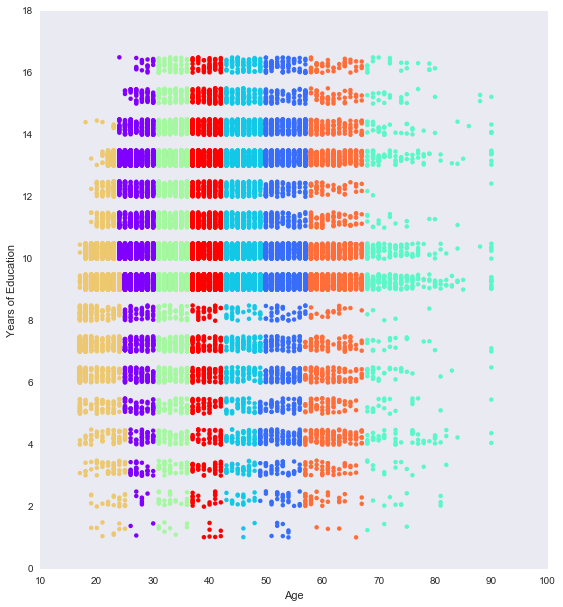

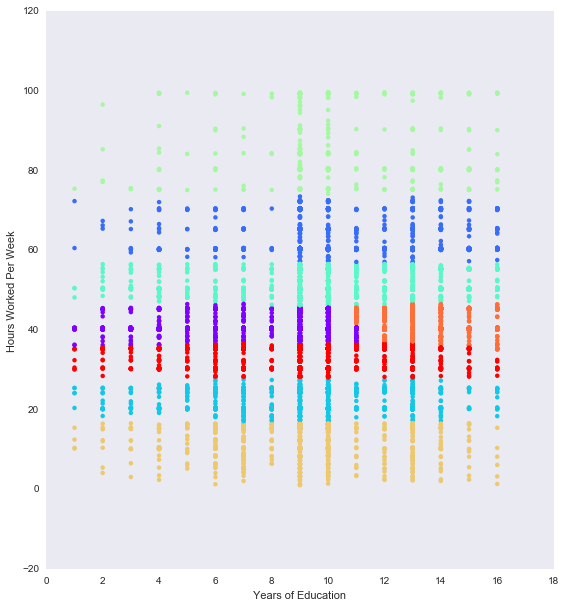

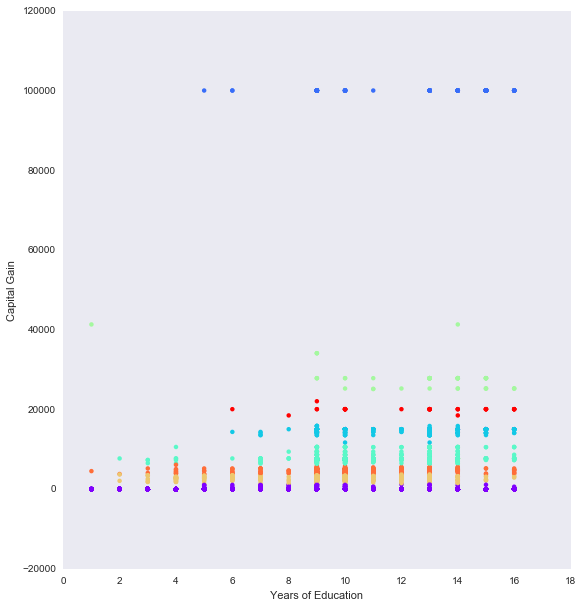

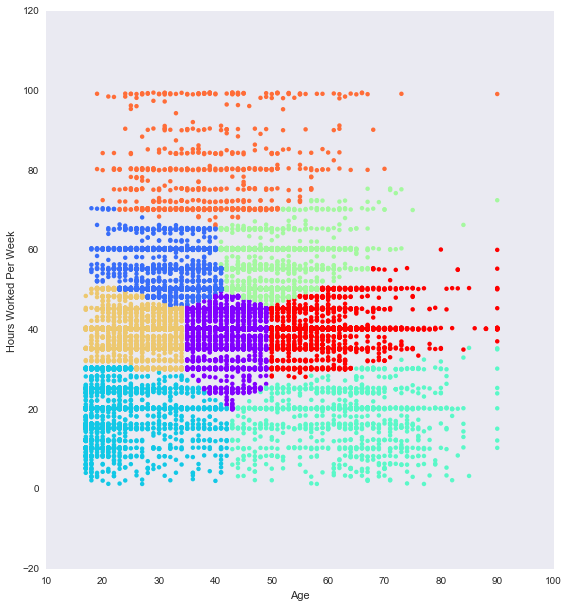

In [42]:
n_clusters = 8

X1 = df[['age', 'education_num']]
X2 = df[['education_num', 'hours_per_week']]
X3 = df[['education_num', 'capital_gain']]
X4 = df[['age', 'hours_per_week']]
 
cls_X1 = KMeans(n_clusters = n_clusters, init='k-means++',random_state=1)
cls_X1.fit(X1)
newfeature_X1 = cls_X1.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_X2 = KMeans(n_clusters = n_clusters, init='k-means++',random_state=1)
cls_X2.fit(X2)
newfeature_X2 = cls_X2.labels_ # the labels from kmeans clustering

# append on the third clustering
cls_X3 = KMeans(n_clusters = n_clusters, init='k-means++',random_state=1)
cls_X3.fit(X3)
newfeature_X3 = cls_X3.labels_ # the labels from kmeans clustering

# append on the fourth clustering
cls_X4 = KMeans(n_clusters = n_clusters, init='k-means++',random_state=1)
cls_X4.fit(X4)
newfeature_X4 = cls_X4.labels_ # the labels from kmeans clustering

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
X1=X1.values
plt.scatter(X1[:, 0], X1[:, 1]+np.random.random(X1[:, 1].shape)/2, c=newfeature_X1, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Age'), plt.ylabel('Years of Education')
plt.grid()

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
X2=X2.values
plt.scatter(X2[:, 0], X2[:, 1]+np.random.random(X2[:, 1].shape)/2, c=newfeature_X2, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Years of Education'), plt.ylabel('Hours Worked Per Week')
plt.grid()

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
X3=X3.values
plt.scatter(X3[:, 0], X3[:, 1]+np.random.random(X3[:, 1].shape)/2, c=newfeature_X3, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Years of Education'), plt.ylabel('Capital Gain')
plt.grid()

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
X4=X4.values
plt.scatter(X4[:, 0], X4[:, 1]+np.random.random(X4[:, 1].shape)/2, c=newfeature_X4, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Age'), plt.ylabel('Hours Worked Per Week')
plt.grid()

We can see from the graphs above that we can verify that hours worked per week versus age looks to be the most meaningful clustering. This clustering also had the best accuracy results in our analysis above. 

### Summarize the Ramifications

We find that using clustering in this project for feature reduction did not dramatically increase our capability to predict salary level with the given dataset. Based on our previous project, classification analysis, we would proceed with using random forest classifier for this dataset as it gave an accuracy of 86%. This corresponds to what we saw in visualizing our data in the exploratory analysis steps, which does not show strong correlation among the attributes. The random forest classifier would be most useful for the business use case. The following details our justification for deployment. 

## Deployment

<b>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?</b>

The usefulness of this project for interested parties follows.  
We can determine the demographic of individuals that make more than or less than $50k annually.  Given targeted marketing is the most effective and provides the greatest ROI, enterprises are typically very interested in mechanisms which refine these efforts.  This model provides a very precise segment of prospects to market high-end, or convesrly, low-end products to ensure the greatest use of marketing expediture and revenue growth.

<b>How would you measure the model's value if it was used by these parties?</b>

One idea to measure the model's value is perform the following:
1. Obtain the advertising cost (let's hypothesize it is $2/person).<br><br>

2. Generate two sample sets for comparision (let's hypothesize we sample 100 individuals for each group):<br>
    a. Random sample from entire dataset.<br>
    b. Sample from target population as predicted by the model.<br><br>
 
3. Determine the response rates for the two samples.<br>
    a. Hypothesize a random sample from entire dataset is 15%.<br>
    b. Hypothesize sample from target population as predicted by the model is 75%.<br><br>

4. Take the difference in response rates.<br>
    a. The model is 5 times more effective at advertisting (15% * 5 = 75%).<br>
    b. Hypothesizing the marketing budget allowing for advertisting to 25,000 people...<br>
        i.  This translates to a $30,000 savings in marketing cost when sending to 25K people.
ii.  $30,000 savings = (25,000 * $2 * 75%) - (25,000 * $2 * 15%)
 
    c. Furthermore, hypothesizing the respondents purchase a \$80K car, task one model just made the company \$1.2B in incremental sales.<br/>
        i.  $1,200,000,000 = $80,000 * ((25,000 * 75%) - (25,000 * 15%))

<b>How would your deploy your model for interested parties?</b> 

This specific model would be deployed on a local machine and run as setup (Pandas).<br>

<b>What other data should be collected?</b>

Additional data that would be needed and collected for this task would be email addresses and scrubbing individuals against opt-out lists.<br>

<b>How often would the model need to be updated, etc.?</b>

Since the census is updated each decade, the model should be updated accordingly with the public census data release.

## Extra Work

For our extra work, we performed agglomerative clustering and multiple attempts at each of these clusterings in testing various attribute combinations, as well as parameters for each clustering instance. The above notebook represents the capabilities that successfully ran and the best combination selections based on our efforts given the time and resource (hardware/memory) constraints.